In [71]:
#imports
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import warnings as w

## Load Data

In [125]:
# load data
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

#creates a dataframe from the numpy ndarrays generated above
df_X_train = pd.DataFrame(X_train, columns=col_names)
df_X_ivs = pd.DataFrame(X_ivs, columns=col_names)
df_y_train = pd.DataFrame(y_train)

#info
print(df_X_train.info())
print(df_X_ivs.info())
print("\n",df_y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Columns: 2132 entries, D00 to FP2088
dtypes: float64(2132)
memory usage: 119.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Columns: 2132 entries, D00 to FP2088
dtypes: float64(2132)
memory usage: 13.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7337 non-null   float64
dtypes: float64(1)
memory usage: 57.4 KB

 None


In [33]:
df_X_train 

#D0 to D42 43 columns 
# FP44 to FP2088 

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
0,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis (EDA)


In [131]:
#check for duplicates
print("Number of Duplicates train set:",df_X_train.duplicated().sum())

#check for missing values
print("Missing Values train set:",df_X_train.isnull().sum().sum())

#check for duplicates
print("Number of Duplicates test set:",df_y_train.duplicated().sum())

#check for missing values
print("Missing Values test set:",df_y_train.isnull().sum().sum())



Number of Duplicates train set: 321
Missing Values train set: 0
Number of Duplicates test set: 4861
Missing Values test set: 0


In [23]:
#statistical info of the data
df_X_train.describe()

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
count,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,...,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000
mean,430.518010,431.037078,5.430285,1.206897,6.527327,1.128799,4.678070,30.497615,59.165190,6.594930,...,0.396211,0.036800,0.031075,0.088456,0.027668,0.011040,0.018264,0.038026,0.094725,0.036800
std,181.613020,181.757699,4.160569,2.527815,5.983082,2.218665,2.789156,12.882724,25.749585,4.403703,...,0.489143,0.188283,0.173533,0.283976,0.164031,0.104497,0.133912,0.191273,0.292855,0.188283
min,135.068414,135.166000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,19.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,357.124405,357.429000,4.000000,0.000000,4.000000,0.000000,3.000000,25.000000,49.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,419.107040,419.500000,5.000000,1.000000,6.000000,1.000000,4.000000,30.000000,57.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,472.228141,472.888000,6.000000,1.000000,8.000000,1.000000,6.000000,33.000000,65.000000,8.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3768.848446,3771.262000,92.000000,47.000000,137.000000,42.000000,58.000000,266.000000,527.000000,93.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df_y_train.describe()

,0
count,7337.000000
mean,0.388388
std,0.276656
min,0.000000
25%,0.169187
50%,0.382177
75%,0.581929
max,1.000000


In [126]:
# first 43 columns D column name until the first FP column name
df_X_train_D = df_X_train.iloc[:, :43]

# from the first FP column till the end
df_X_train_FP = df_X_train.iloc[:, 43:]

df_X_train_D

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42
0,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,10.0,...,23.031669,13.918232,8.076785,8.076785,5.801320,-4.310000,25.940585,10.689861,4.577007,6.932531
1,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,6.0,...,18.052380,10.272353,5.555996,5.555996,3.631044,-2.570000,22.122775,9.493882,4.766210,7.001034
2,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,4.0,...,15.149717,9.339378,5.227266,5.227266,3.910611,-2.620000,16.827325,7.321446,3.641782,4.738475
3,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,28.0,...,59.596941,36.508147,20.077699,20.077699,14.535672,-9.870000,77.735944,38.232130,21.871193,28.304864
4,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,6.0,...,15.204124,9.514758,5.587930,5.587930,4.099881,-1.980000,18.386415,7.947481,4.143126,5.412062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,10.0,...,17.384184,10.484400,5.908498,5.908498,4.151636,-2.590000,22.598490,8.742982,4.468457,6.174319
7333,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,2.0,...,10.703464,6.804014,3.855253,3.855253,2.808474,-1.540000,11.544773,5.402978,2.646921,3.465342
7334,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,5.0,...,23.081019,13.933494,6.917478,6.917478,4.890141,-2.943117,27.101350,13.031545,8.279378,9.545201
7335,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,5.0,...,16.141281,10.345741,6.506813,6.506813,5.197492,-1.980000,18.074260,7.449605,3.105649,4.808789


### Histograms


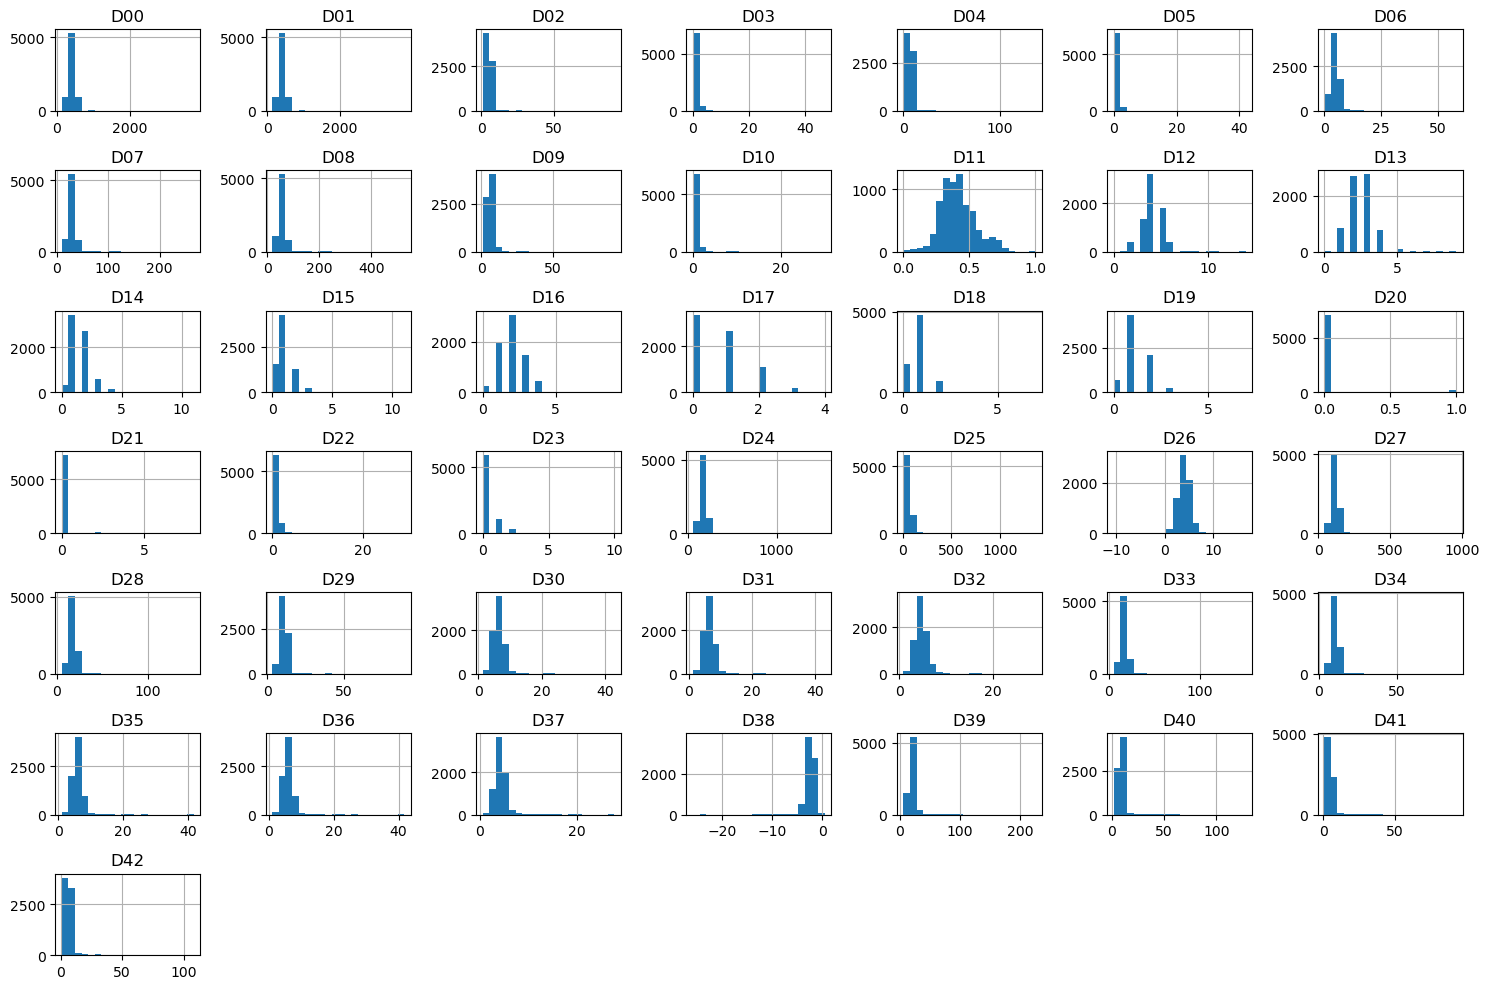

In [47]:
df_X_train_D.hist(bins=20, figsize=(15, 10))
plt.tight_layout() 
plt.show()

Observations:
* We can observe that the columns 'D12' to 'D22' might be categorical

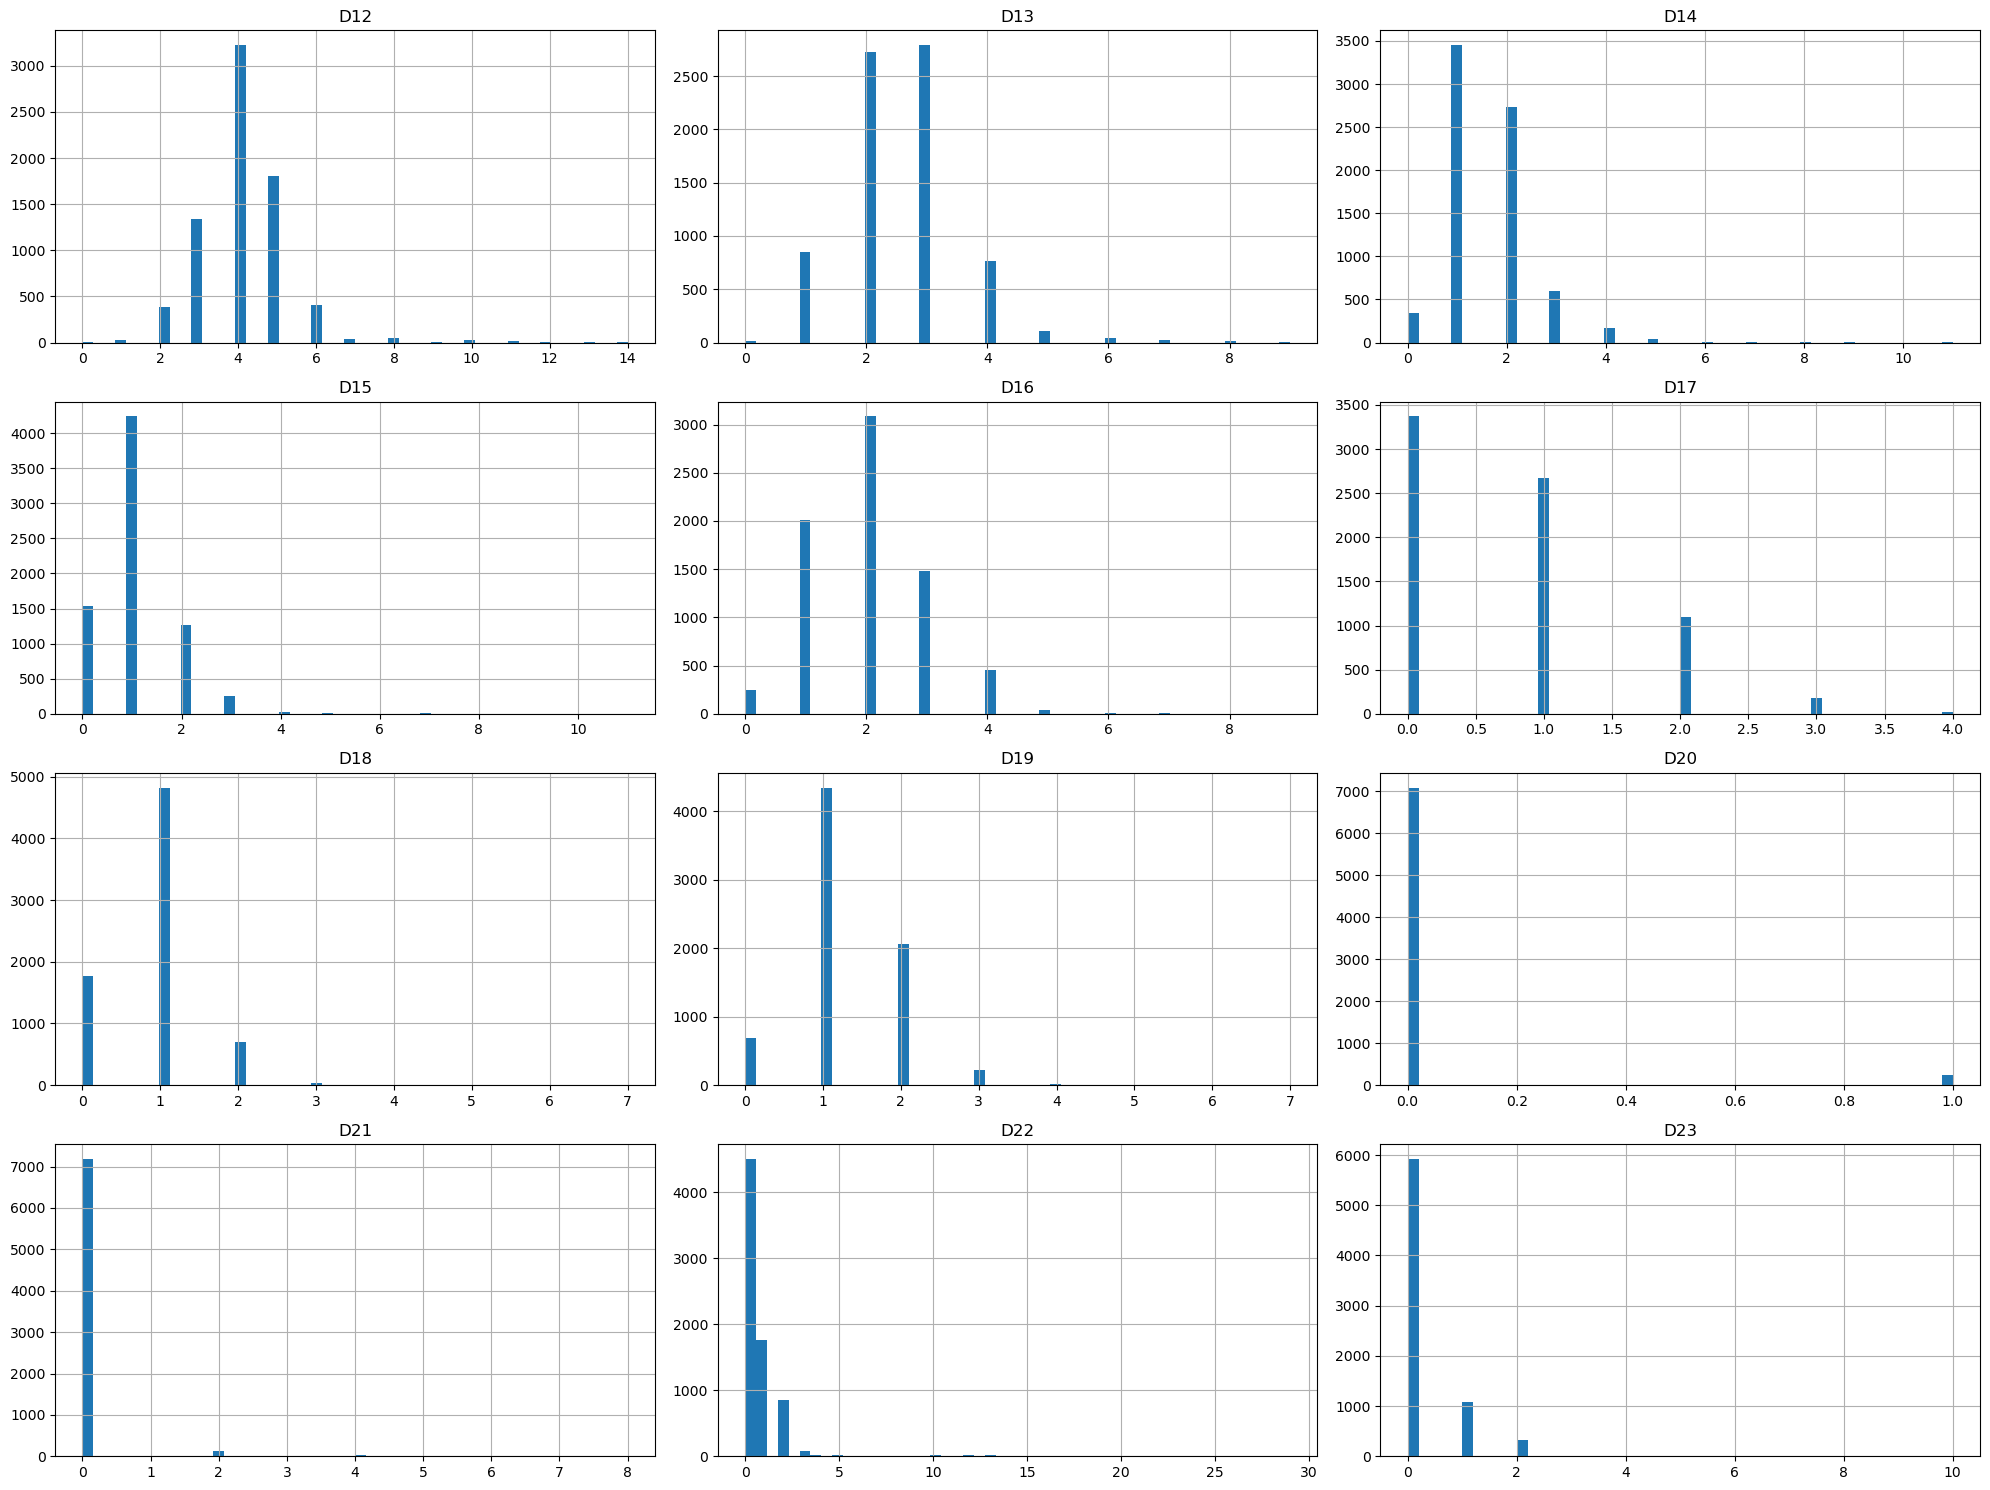

In [72]:
#select columns to plot
columns_to_plot = ['D12', 'D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23']

fig, ax = plt.subplots(figsize=(20, 15))
#ignore warnings
w.filterwarnings('ignore')
df_X_train_D[columns_to_plot].hist(ax=ax, bins=50)
ax.set_title('Histogram of D12 to  D23 Features')
plt.tight_layout() 
plt.show()


After a closer look we can definitely say that all columns except for column 'D22' are categorical.

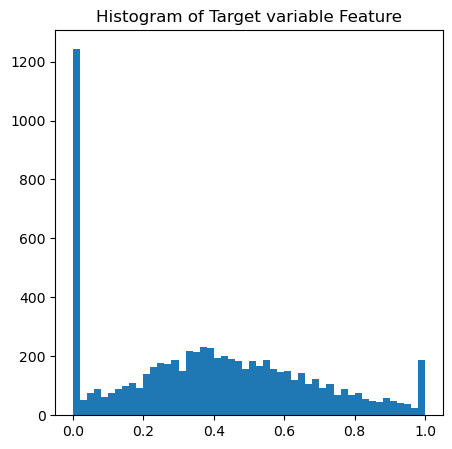

In [70]:
#histogram of the target variable

hist, bin_edges = np.histogram(df_y_train, bins=50)
plt.figure(figsize=(5,5))
plt.hist(df_y_train, bins=50)
plt.title('Histogram of Target variable Feature')
plt.show()

### Check for Outliers
Identify outliers and anomalies in the data.

In [73]:
#calculate the z-score for each point of the training set
z_scores = np.abs((df_X_train_D - df_X_train_D.mean()) / df_X_train_D.std())

#define a threshold value
threshold = 3 # its considered an outiler when the value of the point is 3 * mean of the training set, so the threshold is 3

#Identify the outliers
outliers = df_X_train_D[z_scores > threshold]

#Count the number of outliers
num_outliers = outliers.count().sum()


print(f"outliers \n {outliers} \n") # non null values represent the outliers
print(f"outliers count \n {num_outliers} \n")

outliers 
               D00       D01   D02   D03  D04   D05   D06    D07    D08   D09  \
0             NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
1             NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
2             NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
3     1455.763803  1456.831  27.0  19.0  NaN  17.0  16.0  105.0  206.0  28.0   
4             NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
...           ...       ...   ...   ...  ...   ...   ...    ...    ...   ...   
7332          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
7333          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
7334          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
7335          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
7336          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   

      ...        D33        

### Looking for correlations

In [92]:
# joining the x_train dataframe with the y_train dataframe
df = pd.concat([df_y_train, df_X_train_D], axis = 1)
df.rename(columns = { 0 :'Target'}, inplace=True) # renaming the y_train column

#creates a matrix of correlations
corr_matrix = df.corr() 
#how much each attribute correlates with the target variable value, the lower the value the least relevant the feature is
print("\nCorrelations Matrix\n")
print(corr_matrix['Target'].sort_values(ascending=False))#to present all columns their type cannot be object so we must convert it to float

#plot to present the correlation between the 2 most correlated features with target variable
#sns.pairplot(df, vars=['D32', 'D38'], hue='Target')



Correlations Matrix

Target    1.000000
D32       0.190945
D30       0.188800
D31       0.188800
D29       0.179005
D35       0.177699
D36       0.177699
D37       0.177405
D34       0.172035
D18       0.168539
D27       0.167554
D08       0.165189
D28       0.163278
D24       0.161193
D01       0.160216
D00       0.160182
D33       0.159056
D07       0.157545
D12       0.155987
D04       0.151968
D40       0.150179
D39       0.149645
D19       0.142994
D42       0.139444
D15       0.130716
D02       0.130117
D14       0.129985
D41       0.129056
D06       0.126690
D09       0.125197
D25       0.103851
D11       0.100471
D05       0.095929
D16       0.091133
D26       0.086126
D03       0.084939
D10       0.084491
D13       0.073046
D21       0.025537
D22       0.018931
D17      -0.010915
D23      -0.075756
D20      -0.077215
D38      -0.104582
Name: Target, dtype: float64


In [98]:
N,M=X_train.shape
N,M

# Convert the DataFrame to a numpy array
X_train_array = df_X_train_D.values
y_train_array = df_y_train.values.reshape((-1, 1))

v=np.hstack((y_train_array.reshape((N,1)), X_train_array))
pd.DataFrame(v)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.654947,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,...,23.031669,13.918232,8.076785,8.076785,5.801320,-4.310000,25.940585,10.689861,4.577007,6.932531
1,0.649995,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,...,18.052380,10.272353,5.555996,5.555996,3.631044,-2.570000,22.122775,9.493882,4.766210,7.001034
2,0.154947,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,...,15.149717,9.339378,5.227266,5.227266,3.910611,-2.620000,16.827325,7.321446,3.641782,4.738475
3,0.616176,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,...,59.596941,36.508147,20.077699,20.077699,14.535672,-9.870000,77.735944,38.232130,21.871193,28.304864
4,0.359725,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,...,15.204124,9.514758,5.587930,5.587930,4.099881,-1.980000,18.386415,7.947481,4.143126,5.412062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,0.000000,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,...,17.384184,10.484400,5.908498,5.908498,4.151636,-2.590000,22.598490,8.742982,4.468457,6.174319
7333,0.002193,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,...,10.703464,6.804014,3.855253,3.855253,2.808474,-1.540000,11.544773,5.402978,2.646921,3.465342
7334,0.293481,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,...,23.081019,13.933494,6.917478,6.917478,4.890141,-2.943117,27.101350,13.031545,8.279378,9.545201
7335,0.596804,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,...,16.141281,10.345741,6.506813,6.506813,5.197492,-1.980000,18.074260,7.449605,3.105649,4.808789


In [99]:
pd.DataFrame(np.corrcoef(v.T))

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.000000,0.160182,0.160216,0.130117,0.084939,0.151968,0.095929,0.126690,0.157545,0.165189,...,0.159056,0.172035,0.177699,0.177699,0.177405,-0.104582,0.149645,0.150179,0.129056,0.139444
1,0.160182,1.000000,0.999998,0.919389,0.772557,0.888252,0.784495,0.856242,0.992766,0.973177,...,0.985382,0.975979,0.929465,0.929465,0.882731,-0.885312,0.989940,0.964420,0.925004,0.947125
2,0.160216,0.999998,1.000000,0.919128,0.772379,0.888072,0.784320,0.855980,0.992623,0.972956,...,0.985194,0.975774,0.929243,0.929243,0.882486,-0.884905,0.989854,0.964313,0.924888,0.947052
3,0.130117,0.919389,0.919128,1.000000,0.838103,0.863232,0.843652,0.931528,0.922469,0.905146,...,0.913547,0.892718,0.822973,0.822973,0.768016,-0.889918,0.927493,0.914911,0.898027,0.907124
4,0.084939,0.772557,0.772379,0.838103,1.000000,0.704868,0.993448,0.653117,0.774714,0.769215,...,0.762709,0.747498,0.687134,0.687134,0.648460,-0.765677,0.795875,0.790615,0.798625,0.798076
5,0.151968,0.888252,0.888072,0.863232,0.704868,1.000000,0.710964,0.814021,0.890590,0.909252,...,0.899439,0.886839,0.795339,0.795339,0.733284,-0.788695,0.920619,0.951210,0.940422,0.953377
6,0.095929,0.784495,0.784320,0.843652,0.993448,0.710964,1.000000,0.654943,0.787352,0.780943,...,0.775152,0.760829,0.701621,0.701621,0.663031,-0.778310,0.806191,0.800509,0.804413,0.805600
7,0.126690,0.856242,0.855980,0.931528,0.653117,0.814021,0.654943,1.000000,0.855005,0.830055,...,0.847255,0.824700,0.759285,0.759285,0.705065,-0.802722,0.849430,0.833024,0.805352,0.818308
8,0.157545,0.992766,0.992623,0.922469,0.774714,0.890590,0.787352,0.855005,1.000000,0.985465,...,0.995860,0.989752,0.947416,0.947416,0.903871,-0.917078,0.989313,0.966053,0.921509,0.943469
9,0.165189,0.973177,0.972956,0.905146,0.769215,0.909252,0.780943,0.830055,0.985465,1.000000,...,0.995446,0.995263,0.958375,0.958375,0.918917,-0.875118,0.983173,0.972809,0.929544,0.953863


In [ ]:
# continuar correlations after the data processing


## Data processing


In [133]:
#cant remove directly the duplicates of the training set because the data its already divided
#joining the x_train and the y_trian dataframe to remove the duplicates in a secure way
df = pd.concat([df_y_train, df_X_train_D], axis = 1)
df.rename(columns = { 0 :'Target'}, inplace=True) # renaming the y_train column
df.duplicated().sum()

29

In [116]:
#create dummies to change the variables from numeric to categorical, adding a column for each value
def dummies_for_columns(dataframe, columns_to_change):

    for col in columns_to_change:
        dataframe = pd.concat([dataframe,pd.get_dummies(df[col], prefix= col)], axis = 1)
        dataframe.drop(columns = [col])

    return dataframe

In [117]:

# numeric columns to change to categorical 
columns_to_dummies = ['D12', 'D13','D14','D15','D16','D17','D18','D19','D20','D21','D23']

df_X_train_D = dummies_for_columns(df_X_train_D, columns_to_dummies)

df_X_train_D



,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,D21_4.0,D21_8.0,D23_0.0,D23_1.0,D23_2.0,D23_3.0,D23_4.0,D23_6.0,D23_8.0,D23_10.0
0,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,10.0,...,0,0,1,0,0,0,0,0,0,0
1,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,6.0,...,0,0,1,0,0,0,0,0,0,0
2,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,4.0,...,0,0,0,1,0,0,0,0,0,0
3,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,28.0,...,0,0,1,0,0,0,0,0,0,0
4,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,6.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,10.0,...,0,0,1,0,0,0,0,0,0,0
7333,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,2.0,...,0,0,1,0,0,0,0,0,0,0
7334,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,5.0,...,0,0,0,1,0,0,0,0,0,0
7335,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,5.0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
 #maybe remove outliers check

### Feature Selection


### Train Test Split


In [ ]:
#defining the X and y for the train test split
X = df.iloc[:, 1:]#all columns starting from index 1 onward
y = df.iloc[:, 0]#first column of the dataset "Class" target variable column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

X_train.info()
print("\n")
y_train.info()
print("\n")
X_test.info()
print("\n")
y_test.info()


### Scaling, Imputation and Classification models

#### Auxiliar functions

In [19]:
# Execute list of scalers, imputers,models and present the results 
def test_models (scalers, imputers,models, X_train, y_train, X_test,y_test, verbose):
    results =[]
    ct = 0
    for name_scaler, scaler in scalers:
        for name_imputer, imputer in imputers:
            for name_mod, model in models:
                #scaling
                scaler.fit(X_train)
                Xt_train = scaler.transform(X_train)
                Xt_test  = scaler.transform(X_test)

                #imputing
                imputer.fit(Xt_train)
                Xt_train = imputer.transform(Xt_train)
                Xt_test  = imputer.transform(Xt_test)


                model.fit(Xt_train, y_train)
                preds = model.predict(Xt_test) #PREDICTION

                #present model number
                if verbose:
                    ct += 1
                    print("\nModel %d" % ct)

                #save results
                results = save_results (name_scaler, scaler, name_imputer, imputer, name_mod, model, results,y_test, preds, verbose)
    
    results_sorted = sorted(results, key=lambda x: x[8], reverse=True) #f1 sorted decreasing
    display_results(results_sorted)
    return results



# Save the model scores and present intermediate results (w/ verbose)
# Returns the list with the saved results 
def save_results(name_scaler, scaler,name_imputer, imputer, name_mod, model, results, y_test, preds, verbose):

    # Calculate the precision, recall, f1 and mcc scores
    #the target variable Class has 5 different values so we need to do a weighted average for the precision, recall and f1 scores
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    mcc = matthews_corrcoef(y_test, preds)
    
    if verbose:
        print(f"Scaler: {scaler} imputer: {imputer} classifier: {name_mod} {model}")
        print("The Precision is: %7.4f" % precision)
        print("The Recall is: %7.4f" % recall)
        print("The F1 score is: %7.4f" % f1)
        print("The Matthews correlation coefficient is: %7.4f" % mcc)
        print()
        print("This is the Confusion Matrix")
        print(pd.DataFrame(confusion_matrix(y_test, preds)))


    results.append((name_scaler,
                    scaler,
                    name_imputer, 
                    imputer, 
                    name_mod, 
                    model,
                    precision,
                    recall,
                    f1,
                    mcc,                    
                    ))
    return results

# Display the model final results. Receives the ordered results to present
def display_results (results):        
    
    noshow = ""
    print (f"\n--------------------------Results for Classification Models Performance--------------------------")
    for res in results:
        name_scaler = res [0]
        scaler = res [1]
        name_imputer = res [2]
        imputer = res [3]
        name_mod = res [4]
        model = res [5]
        precision = res [6]
        recall = res [7]
        f1 = res [8]
        mcc = res [9]

        print(f"{name_mod.ljust(25)} | precision     {precision:.4f} | recall     {recall:.4f} | f1     {f1:.4f}| mcc     {mcc:.4f}")
        print(f"{noshow.ljust(25)} | scaler {scaler} | imputer {imputer}")  

    

In [ ]:
# Defining a list of scalers
scalers = [
    ('PowerTransformer', PowerTransformer()),
    ('MinMaxScaler', MinMaxScaler()),
    ('StandardScaler', StandardScaler())
]

# Defining a list of Imputers
imputers = [
    ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('KNNImputer', KNNImputer(n_neighbors=3))
]

# Defining a list of classification models
classification_models = [
    ('LogisticRegression', LogisticRegression(C = 0.01)),
    ('LogisticRegression', LogisticRegression(C = 1)),
    ('DecisionTree_maxd10', DecisionTreeClassifier(max_depth = 10)),
    ('DecisionTree_maxd20', DecisionTreeClassifier(max_depth = 20)),
    ('DecisionTree_minsl20', DecisionTreeClassifier(min_samples_leaf = 5)),
    ('DecisionTree_minsl10', DecisionTreeClassifier(min_samples_leaf = 10)),
    ('DecisionTree_critgini', DecisionTreeClassifier(criterion = 'gini')),
    ('DecisionTree_critentropy', DecisionTreeClassifier(criterion = 'entropy')),
    ('GaussianNB', GaussianNB()),
    ('KNN_K3_balltree', KNeighborsClassifier(n_neighbors = 3, algorithm = 'ball_tree')),
    ('KNN_K3_kdtree', KNeighborsClassifier(n_neighbors = 3, algorithm = 'kd_tree')),
    ('KNN_K5_balltree', KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree')), 
    ('KNN_K5_kdtree', KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree')),
    ('KNN_K5_balltree_wdist', KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree',weights = 'distance')), 
    ('KNN_K5_kdtree_wdist', KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree',weights = 'distance'))
]


results_classification = []
VERBOSE = False # True to present/print the progress of the model performance

results_classification =  test_models (scalers, imputers, classification_models, X_train, y_train, X_test,y_test, VERBOSE)



os dados tem uumas colunas de dados normais ao inicio, e depois tem muitas colunas onde são só 0 e 1 que representam que cenas é que foram injetadas no objeto de estudo

deveremos dar scaling na primeira parte dos dados
vamos fazer tipo x= = x_train(:,:,44), dar scale nisso, e depois fazer v.stack
esta primeira parte são as primeiras 44 colunas

faz sentido fazermos um modelo só com a primeira parte? ou só com a segunda?

* scaling before feature selection
* dont forget to scale the IVS to test !!!!!!


ver se tem outliers e se faz sentido verifica los, check the z score etc and check the p2 of AAA, result of outlier was strange i gotta check the values again 
fazer o scaling ates de fazer qualquer tipo de feature selection

Data processing:
* Eliminate duplicates from training and test set
* Add dummies to remove the categorical data from the dataset
* Check if removing outliers is viable
* Verify if scaling is before or after the correlations
